# AIG 100 – Project 1: Real-World Dataset Exploration

# Analysis of Heart Disease Indicators

## Background
Cardiovascular diseases (CVDs) are the leading cause of death globally, claiming millions of lives each year, and heart disease constitutes a significant portion of these fatalities. The burden of heart disease is not only measured in mortality rates but also in the quality of life and economic impact on healthcare systems. With advances in medical research and data science, predictive analytics has emerged as a key area of interest, offering potential for early detection and prevention strategies that could significantly alter the course of this disease.

## Objective
The objective of this report is to analyze the Indicators of Heart Disease dataset to uncover patterns and factors that contribute to the risk of developing heart disease. Through this analysis, we aim to enhance the understanding of the disease's dynamics and support the development of predictive models that can aid in early diagnosis and personalized treatment plans.

## Structure of the Report
The report will first outline the data cleaning and preprocessing steps undertaken to ensure the quality and reliability of the dataset. This will be followed by an exploratory data analysis (EDA) to visually and quantitatively describe the data's characteristics. The report will then detail the statistical inference methods employed to test specific hypotheses about the relationships within the data. Subsequently, we will present the findings using various data visualization techniques to illustrate the key insights. Finally, we will reflect on the analysis process, discuss its implications, and suggest directions for future research.

By the end of this report, we will have provided a comprehensive analysis of the Indicators of Heart Disease dataset, revealing valuable insights into the factors associated with heart disease and highlighting the potential for predictive analytics in combating this prevalent condition.

## 1. Dataset Selection and Preliminary Research

### 1.1. Dataset Selection

**Source of the Data**

The dataset utilized for this study was sourced from Kaggle, an online community of data scientists and machine learning practitioners that provides access to a wide array of datasets. The specific dataset, titled "Indicators of Heart Disease," can be found at the following URL: Kaggle: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/data.

The dataset chosen for this analysis originates from the Centers for Disease Control and Prevention (CDC) and forms an integral part of the Behavioral Risk Factor Surveillance System (BRFSS). The BRFSS is a cornerstone of epidemiological data collection in the United States, conducting annual telephone surveys to gather comprehensive data regarding the health and behavioral risk factors of U.S. residents. Established in 1984 with participation from 15 states, the BRFSS has significantly expanded its scope and now collects data across all 50 states, the District of Columbia, and three U.S. territories. With its rigorous methodology and expansive reach, the BRFSS completes over 400,000 adult interviews each year, positioning it as the most extensive continuously conducted health survey system globally. The dataset used in this study encompasses the most recent data from the year 2023, providing up-to-date insights into the health indicators relevant to heart disease.


**Description of the Dataset**

The "Indicators of Heart Disease" dataset is a compilation of personal health indicators related to heart disease. It includes the following types of information:

- Demographic Data: Age, sex, and other personal attributes that can influence the risk of heart disease.
- Health Behaviors: Lifestyle factors such as smoking status, physical activity, and diet that are known to impact heart health.
- Medical History: Information on comorbid conditions such as stroke, diabetes, and hypertension, among others.
- Health Metrics: Clinical measurements like Body Mass Index (BMI), cholesterol levels, and blood pressure.

**Potential for Analysis**

Given the diversity and richness of the data, this dataset provides an excellent opportunity for in-depth analysis of heart disease indicators. The variety of data points allows for exploration of complex relationships and the development of models to predict heart disease risk. The dataset's structure supports both descriptive and predictive analyses, making it a valuable resource for researchers interested in the epidemiology of heart disease, public health policy, and personalized medicine approaches.

**Ethical Considerations**

The dataset is anonymized, with no personal identification information included, mitigating privacy concerns. However, it is vital to approach the analysis with sensitivity to the implications that findings may have for individuals with heart disease and to consider the potential for misuse of predictive modeling in healthcare.

**1.1.1. Loading the data**

In [1]:
import pandas as pd

heart_df = pd.read_csv('heart.csv')

heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [2]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [3]:
heart_df.shape

(1025, 14)

In [4]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### 1.2. Preliminary Research

**1.2.1. Variables Overview**

The dataset heart.csv includes the following columns:

Demographic Factors:
-  **age:** Age of the patient
-  **sex:** Gender of the patient (1 = male; 0 = female)

Clinical Measurements and History:
-  **cp:** Chest pain type (Value 0: asymptomatic; 1: atypical angina; 2: non-anginal pain; 3: typical angina)
-  **trestbps:** Resting blood pressure (in mm Hg on admission to the hospital)
-  **chol:** Serum cholesterol in mg/dl
-  **fbs:** Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
-  **restecg:** Resting electrocardiographic results (Values 0, 1, 2)
-  **thalach:** Maximum heart rate achieved
-  **exang:** Exercise induced angina (1 = yes; 0 = no)
-  **oldpeak:** ST depression induced by exercise relative to rest
-  **slope:** The slope of the peak exercise ST segment
-  **ca:** Number of major vessels (0-3) colored by fluoroscopy
-  **thal:** Thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

Outcome Variable:
- **target:** Heart disease (1 = disease; 0 = no disease)

**1.2.2. Potential Questions for Exploration**

Given the dataset's structure, here are some potential questions to explore:

- Which clinical measurements are most strongly associated with the presence of heart disease? This can help in identifying high-risk individuals.

- How do age and gender influence the prevalence of heart disease and the distribution of other risk factors like cholesterol levels and blood pressure?

-  Is there a significant correlation between the type of chest pain experienced and the presence of heart disease?

- Can lifestyle indicators (inferred from variables like fasting blood sugar and exercise-induced angina) predict the presence of heart disease?

## 2. Data Cleaning and Preprocessing

In [5]:
# Check for missing values and data types
missing_values = heart_df.isnull().sum()

missing_values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Summary statistics to help identify outliers
summary_statistics = heart_df.describe()

summary_statistics

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#Verify and address the issue with the `ca` variable
ca_value_counts = heart_df['ca'].value_counts()
ca_value_counts

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

### 2.1. 'ca' Variable Analysis

The **ca variable**, which represents the number of major vessels colored by fluoroscopy, shows values ranging from 0 to 4, despite the expectation of a 0-3 range. Given that there are 18 instances of ca being 4, this might indicate either a data entry error or an additional category not originally described. Depending on the analysis context and the importance of accurate categorization for ca, one approach could be to treat "4" as a missing or distinct category. For the purposes of statistical analysis and modeling, we might choose to either exclude these records or recategorize them based on further clinical input.

In [8]:
# Calculate the total number of rows
total_rows = heart_df.shape[0]

# Calculate the number of rows where ca=4
rows_ca_4 = (heart_df['ca'] == 4).sum()

# Calculate the percentage of the dataset that these rows constitute
percentage_ca_4 = (rows_ca_4 / total_rows) * 100

total_rows, rows_ca_4, percentage_ca_4

(1025, 18, 1.75609756097561)

Given their small proportion, removing these rows could be considered a reasonable approach to maintain data integrity without substantially reducing the dataset size.

In [9]:
# Exclude rows where ca=4
heart_df_cleaned = heart_df[heart_df['ca'] != 4]

# Recheck the dataset size after exclusion
new_total_rows = heart_df_cleaned.shape[0]

# Calculate the number of rows removed
rows_removed = total_rows - new_total_rows

new_total_rows, rows_removed

(1007, 18)

### 2.2. Outliers in trestbps, chol, and thalach

In [10]:
#Identify outliers in 'trestbps', 'chol', and 'thalach' using IQR method
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers[column]

trestbps_outliers = find_outliers(heart_df, 'trestbps')
chol_outliers = find_outliers(heart_df, 'chol')
thalach_outliers = find_outliers(heart_df, 'thalach')

trestbps_outliers.describe(), chol_outliers.describe(), thalach_outliers.describe()

(count     30.000000
 mean     182.000000
 std        8.788707
 min      172.000000
 25%      178.000000
 50%      180.000000
 75%      180.000000
 max      200.000000
 Name: trestbps, dtype: float64,
 count     16.000000
 mean     436.250000
 std       63.810657
 min      394.000000
 25%      407.000000
 50%      409.000000
 75%      417.000000
 max      564.000000
 Name: chol, dtype: float64,
 count     4.0
 mean     71.0
 std       0.0
 min      71.0
 25%      71.0
 50%      71.0
 75%      71.0
 max      71.0
 Name: thalach, dtype: float64)

- **Resting Blood Pressure (trestbps):** 30 instances are identified as outliers, with values ranging mostly around the upper extreme (up to 200 mm Hg). These could be considered extreme but plausible values in patients with severe hypertension.
- **Serum Cholesterol (chol):** 16 instances are identified as outliers, with very high cholesterol levels (up to 564 mg/dl). While these are extreme, they are not impossible in clinical scenarios, especially in cases of severe hypercholesterolemia.
- **Maximum Heart Rate Achieved (thalach):** 4 instances are considered outliers, all at the low end (71 bpm). These values might indicate patients with significant heart disease or other medical conditions affecting their heart rate.

## 3. Exploratory Data Analysis

### 3.1. Distribution of Key Variables

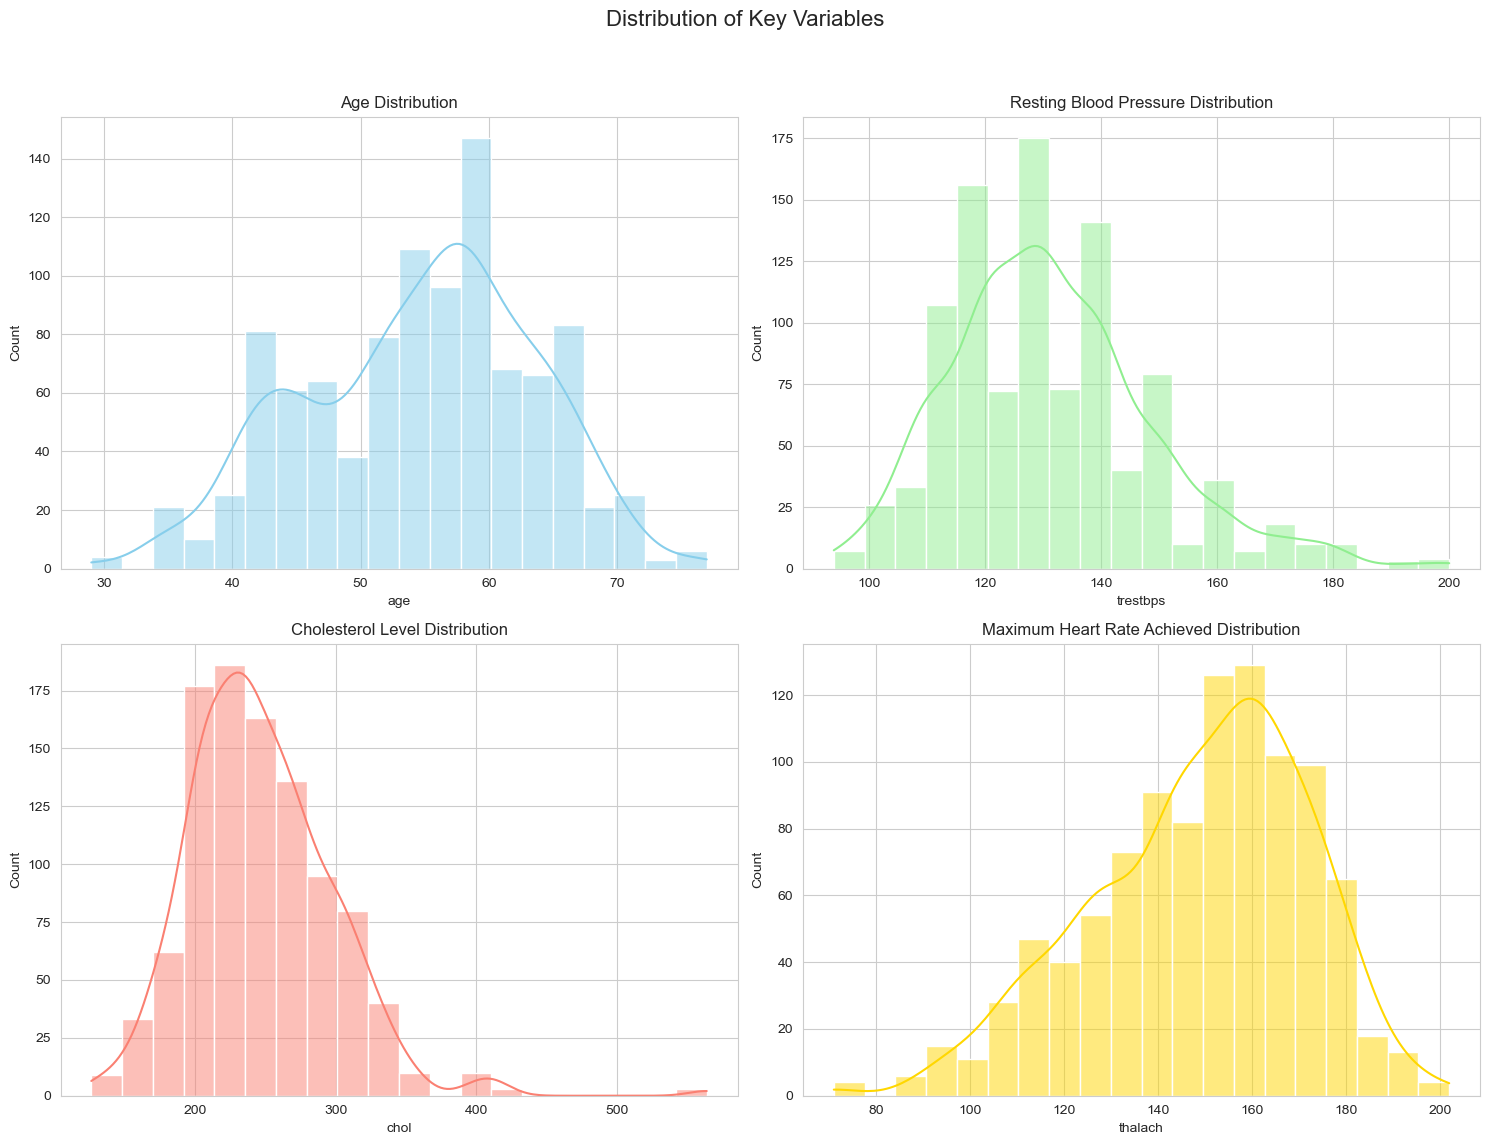

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Prepare the figure layout
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Key Variables', fontsize=16)

# Plot histograms
sns.histplot(heart_df_cleaned['age'], bins=20, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Age Distribution')

sns.histplot(heart_df_cleaned['trestbps'], bins=20, kde=True, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Resting Blood Pressure Distribution')

sns.histplot(heart_df_cleaned['chol'], bins=20, kde=True, ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Cholesterol Level Distribution')

sns.histplot(heart_df_cleaned['thalach'], bins=20, kde=True, ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Maximum Heart Rate Achieved Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the suptitle
plt.show()

The histograms above illustrate the distribution of key variables in the dataset:

- **Age Distribution:** The age of individuals in the dataset appears to be roughly normally distributed, with a slight right skew, indicating a larger number of older individuals. This is expected given the context of heart disease prevalence increasing with age.

- **Resting Blood Pressure (trestbps) Distribution:** The distribution of resting blood pressure shows a normal distribution with a slight right skew. Most individuals have blood pressure in the expected range, with a few outliers on the higher end.

- **Cholesterol Level (chol) Distribution:** Cholesterol levels are also roughly normally distributed with a right skew, indicating that while most individuals have cholesterol levels within a normal range, there is a significant number with elevated levels, which is a risk factor for heart disease.

- **Maximum Heart Rate Achieved (thalach) Distribution:** The distribution of maximum heart rate achieved during exercise shows a somewhat left-skewed distribution, with most individuals achieving a high maximum heart rate, which tends to decrease with age and cardiovascular problems.

### 3.2. Relationship Between Age and Maximum Heart Rate

To explore the relationship between age and maximum heart rate achieved, I will use the scatterplot, colored by the presence of heart disease (target). This visualization can highlight if there's a noticeable pattern between these variables and the condition.

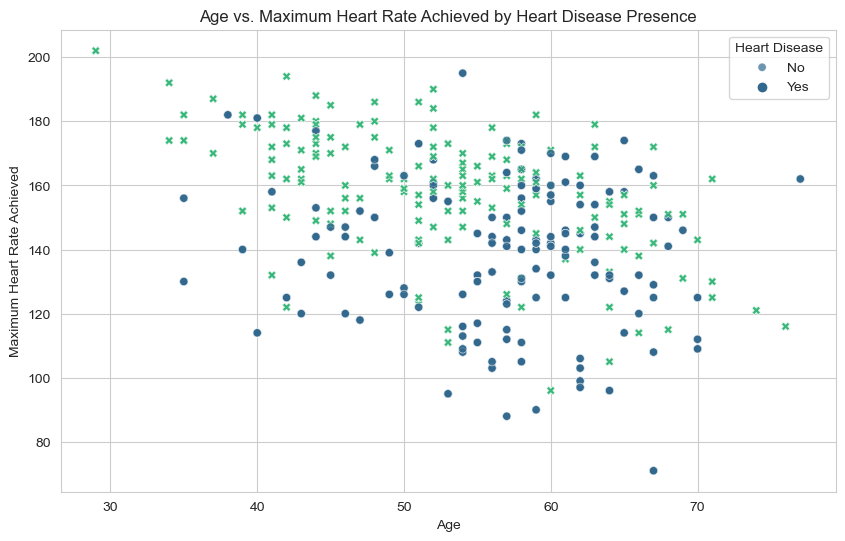

In [12]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=heart_df_cleaned, x='age', y='thalach', hue='target', style='target', palette='viridis', alpha=0.7)

# Adding titles and labels
plt.title('Age vs. Maximum Heart Rate Achieved by Heart Disease Presence')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')

# Adding a legend to clarify the markers
plt.legend(title='Heart Disease', labels=['No', 'Yes'])

# Show the plot
plt.show()

The scatter plot above illustrates the relationship between age and maximum heart rate achieved, with individuals colored based on the presence of heart disease (target).

*Key observations include:*

- As age increases, there tends to be a decrease in the maximum heart rate achieved, which aligns with general expectations about cardiovascular fitness declining with age.
- Individuals with heart disease (marked as "Yes") are spread across the age spectrum but seem to have a slightly lower maximum heart rate for their age compared to those without heart disease, especially in older age groups.
- There's a wide variation in maximum heart rate among individuals with and without heart disease, indicating that while there may be a trend, it's not a definitive predictor on its own.

### 3.3. Heart Disease Presence Across Different Chest Pain Types

To explore how the presence of heart disease varies across different chest pain types (cp), I will use a bar chart to visualize this comparison, which can help identify if certain types of chest pain are more strongly associated with heart disease.

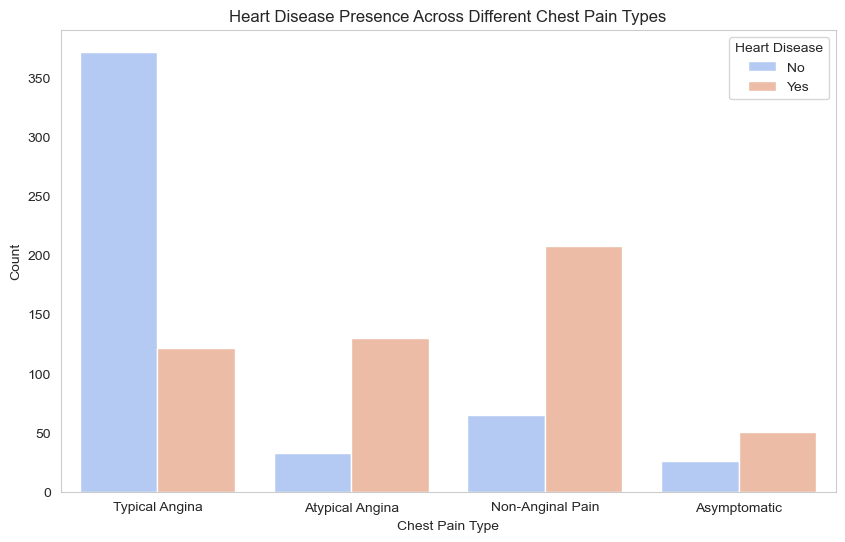

In [13]:
# Bar chart for Heart Disease presence across different Chest Pain types
plt.figure(figsize=(10, 6))
sns.countplot(data=heart_df_cleaned, x='cp', hue='target', palette='coolwarm')
plt.title('Heart Disease Presence Across Different Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.xticks(ticks=[0, 1, 2, 3], labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
plt.grid(axis='y')
plt.show()

The box plots above compare cholesterol levels and resting blood pressure between individuals with and without heart disease, revealing several insights:

*Cholesterol Levels:*
Both groups (with and without heart disease) show a wide range of cholesterol levels, with median levels slightly higher in the group with heart disease. However, the overlap is substantial, indicating that while cholesterol is a factor, it's not the sole determinant of heart disease.
Outliers are present in both groups, especially in the higher cholesterol levels, reflecting the variability in individual health profiles.

*Resting Blood Pressure:*
Similar to cholesterol levels, both groups exhibit a broad range of resting blood pressures. The medians are relatively close, with a slight increase in the heart disease group, but again, there's considerable overlap.
There are outliers in both groups, particularly on the higher end, which could indicate cases of hypertension.
These visualizations underscore the complexity of heart disease and the multifactorial nature of its risk factors. While higher cholesterol and blood pressure may be associated with heart disease, they are part of a broader set of factors that influence an individual's risk.

### 3.4. Comparison of Cholesterol Levels and Resting Blood Pressure by Heart Disease Presence

To further understand the relationship between cholesterol levels, resting blood pressure, and heart disease, we can compare these variables between individuals with and without heart disease using box plots. This comparison can highlight if higher levels of cholesterol or blood pressure are associated with an increased presence of heart disease.

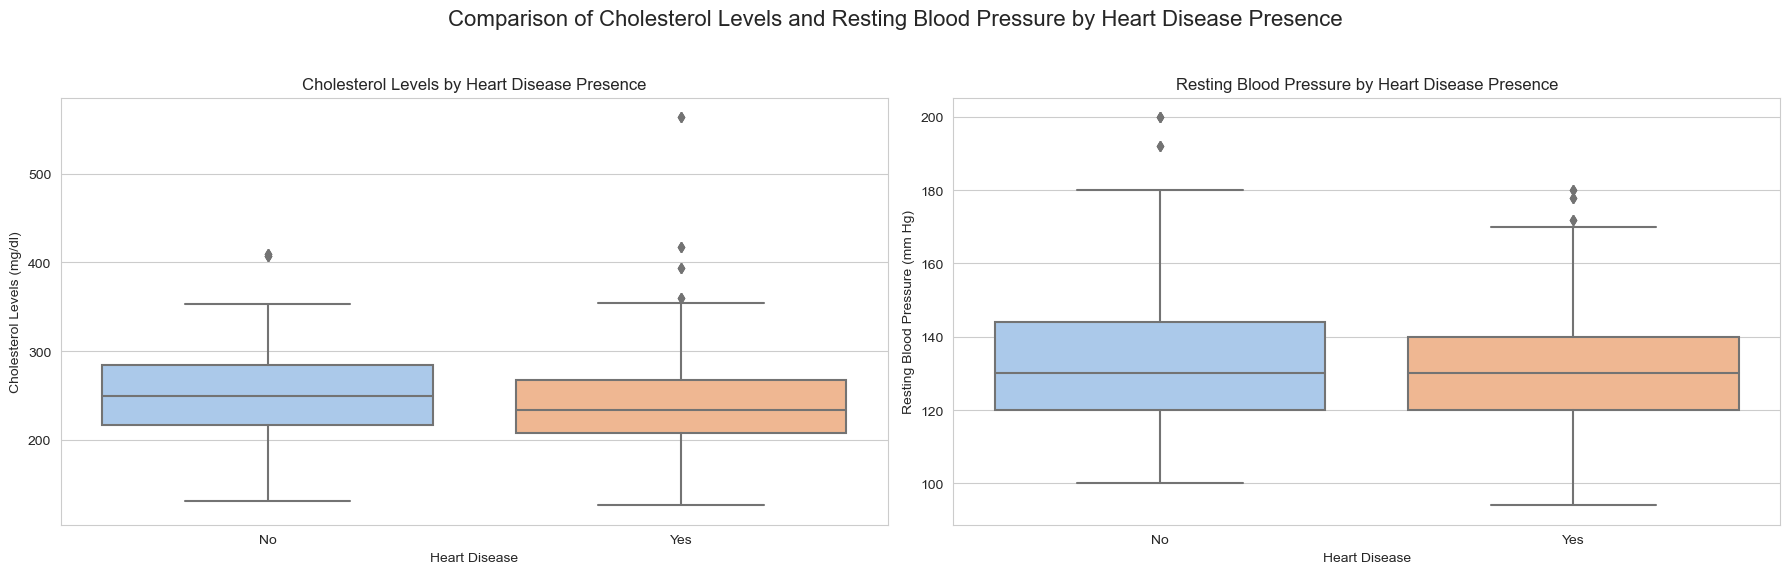

In [14]:
# Prepare the figure layout
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Comparison of Cholesterol Levels and Resting Blood Pressure by Heart Disease Presence', fontsize=16)

# Box plot for Cholesterol Levels by Heart Disease Presence
sns.boxplot(data=heart_df_cleaned, x='target', y='chol', ax=axes[0], palette='pastel')
axes[0].set_title('Cholesterol Levels by Heart Disease Presence')
axes[0].set_xlabel('Heart Disease')
axes[0].set_ylabel('Cholesterol Levels (mg/dl)')
axes[0].set_xticklabels(['No', 'Yes'])

# Box plot for Resting Blood Pressure by Heart Disease Presence
sns.boxplot(data=heart_df_cleaned, x='target', y='trestbps', ax=axes[1], palette='pastel')
axes[1].set_title('Resting Blood Pressure by Heart Disease Presence')
axes[1].set_xlabel('Heart Disease')
axes[1].set_ylabel('Resting Blood Pressure (mm Hg)')
axes[1].set_xticklabels(['No', 'Yes'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

The box plots above compare cholesterol levels and resting blood pressure between individuals with and without heart disease, revealing several insights:

**Cholesterol Levels**
- Both groups (with and without heart disease) show a wide range of cholesterol levels, with median levels slightly higher in the group with heart disease. However, the overlap is substantial, indicating that while cholesterol is a factor, it's not the sole determinant of heart disease.
- Outliers are present in both groups, especially in the higher cholesterol levels, reflecting the variability in individual health profiles.

**Resting Blood Pressure**
- Similar to cholesterol levels, both groups exhibit a broad range of resting blood pressures. The medians are relatively close, with a slight increase in the heart disease group, but again, there's considerable overlap.
- There are outliers in both groups, particularly on the higher end, which could indicate cases of hypertension.

These visualizations underscore the complexity of heart disease and the multifactorial nature of its risk factors. While higher cholesterol and blood pressure may be associated with heart disease, they are part of a broader set of factors that influence an individual's risk.

### 3.4. Comparison of Prevalence of Heart by Gender

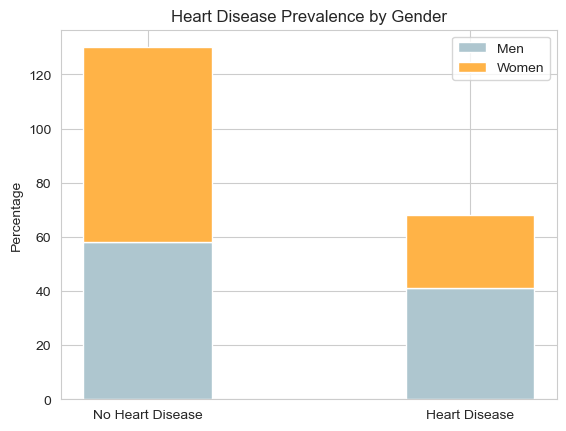

In [15]:
import matplotlib.pyplot as plt

categories = ['No Heart Disease', 'Heart Disease']
men_percentages = [58, 41]
women_percentages = [72, 27]

x = range(len(categories))  

pastel_blue = '#aec6cf'  
pastel_orange = '#ffb347'  

plt.bar(x, men_percentages, width=0.4, label='Men', color=pastel_blue)
plt.bar(x, women_percentages, width=0.4, label='Women', color=pastel_orange, bottom=men_percentages)

plt.ylabel('Percentage')
plt.title('Heart Disease Prevalence by Gender')
plt.xticks(x, categories)
plt.legend()

plt.show()

The stacked bar chart above shows the prevalence of heart disease by gender, with blue representing men and orange representing women. The bars are stacked, indicating the proportion of each gender with and without heart disease.

**Key Observations from the Stacked Bar Chart**

- The total height of each bar represents 100% of each subgroup (men and women).
- For the "No Heart Disease" category, a substantial portion of the bar is blue, indicating that a larger percentage of men than women do not have heart disease.
- In the "Heart Disease" category, the bars are more evenly split between blue and orange, suggesting a more equal distribution of heart disease between men and women in this dataset.

When interpreting this chart, it is important to note that while the absolute numbers of men and women with heart disease could be different, this type of chart focuses on the percentage within each gender category. Therefore, this chart is useful for understanding the relative distribution within each group, but not for comparing the absolute prevalence between men and women

## 4. Statistical Inference

### 4.1. Hypotheses to Test

**Hypothesis 1 (H1):** There is a significant difference in maximum heart rate achieved (thalach) between individuals with and without heart disease.

- Null Hypothesis (H0): There is no significant difference in maximum heart rate achieved between individuals with and without heart disease.
- Alternative Hypothesis (H1): There is a significant difference in maximum heart rate achieved between individuals with and without heart disease.

**Hypothesis 2 (H2):** Age has a significant effect on maximum heart rate achieved (thalach) among individuals with heart disease.

- Null Hypothesis (H0): Age does not significantly affect maximum heart rate achieved among individuals with heart disease.
- Alternative Hypothesis (H1): Age significantly affects maximum heart rate achieved among individuals with heart disease.

### 4.2. Statistical Tests

**4.2.1. For Hypothesis 1:** An Independent Samples t-test can be used to compare the means of maximum heart rate achieved between two independent groups (those with and without heart disease).

In [16]:
from scipy.stats import ttest_ind

# Separate the groups
group_no_disease = heart_df_cleaned[heart_df_cleaned['target'] == 0]['thalach']
group_with_disease = heart_df_cleaned[heart_df_cleaned['target'] == 1]['thalach']

# Perform the Independent Samples t-test
t_stat, p_value = ttest_ind(group_no_disease, group_with_disease)

t_stat, p_value

(-14.602686440869833, 6.097288315787836e-44)

***Interpretation***

The t-statistic is significantly negative, indicating that the mean maximum heart rate achieved by individuals without heart disease is higher than that of individuals with heart disease. The magnitude of this statistic reflects a substantial difference between the two groups.

The p-value is much lower than the typical alpha level of 0.05, indicating that the difference in maximum heart rate achieved between individuals with and without heart disease is statistically significant.

***Conclusion***

Based on these results, we reject the null hypothesis (H0) and accept the alternative hypothesis (H1), concluding that there is a significant difference in maximum heart rate achieved between individuals with and without heart disease. This supports the notion that heart disease may impact an individual's ability to achieve a high maximum heart rate during exercise.

**4.2.2. For Hypothesis 2:** A Pearson Correlation Coefficient test can be used to examine the relationship between age and maximum heart rate achieved among individuals with heart disease, to see if the relationship is statistically significant.

In [17]:
from scipy.stats import pearsonr

# Filter the dataset for individuals with heart disease
heart_disease_df = heart_df_cleaned[heart_df_cleaned['target'] == 1]

# Variables for correlation
age_with_disease = heart_disease_df['age']
thalach_with_disease = heart_disease_df['thalach']

# Calculate the Pearson Correlation Coefficient and p-value
correlation_coef, p_value_correlation = pearsonr(age_with_disease, thalach_with_disease)

correlation_coef, p_value_correlation

(-0.5234906752998341, 2.686193305151246e-37)

***Interpretation***

The correlation coefficient of -0.523 indicates a moderate negative correlation between age and maximum heart rate achieved (thalach) among individuals with heart disease. This suggests that as age increases, the maximum heart rate achieved during exercise tends to decrease among those with heart disease.

The p-value is extremely low (2.686e-37), far below the conventional alpha level of 0.05, indicating that this correlation is statistically significant. This means there's a very low probability that such a correlation could be observed by chance, thus supporting the alternative hypothesis (H1).

***Conclusion***

Based on these results, we can conclude that age significantly affects the maximum heart rate achieved among individuals with heart disease, with older individuals showing a lower maximum heart rate during exercise. This finding aligns with physiological expectations and underscores the importance of considering age when evaluating cardiovascular fitness and health, especially in the context of heart disease.

## 5. Visualization and Presentation of Findings

### 5.1. Distribution of Key Variables

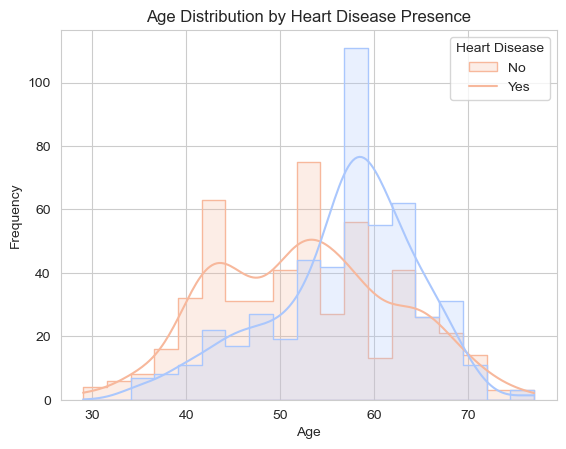

In [18]:
sns.histplot(data=heart_df_cleaned, x='age', hue='target', kde=True, element='step', palette='coolwarm')
plt.title('Age Distribution by Heart Disease Presence')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])

The histogram is divided into two groups:

- Individuals without heart disease (colored in orange)

- Individuals with heart disease (colored in blue)

From the visualization, it appears that there are two distinct age distributions for individuals with and without heart disease. The age distribution for individuals without heart disease may be slightly right-skewed, indicating a higher frequency of younger individuals within this group. Conversely, the age distribution for individuals with heart disease is likely to be more normally distributed or even left-skewed, suggesting a concentration of cases in the middle to older age range.

The KDE curves help to visualize the probability density of the ages for both groups. The peak of the blue curve (heart disease present) seems to occur later in age than the peak of the orange curve (no heart disease), which supports the idea that the prevalence of heart disease increases with age.

The overlap between the two distributions indicates that while age is a factor in heart disease, it's not the sole determinant, as there are individuals with heart disease across a broad age range.

### 5.2. Relationship Between Variables

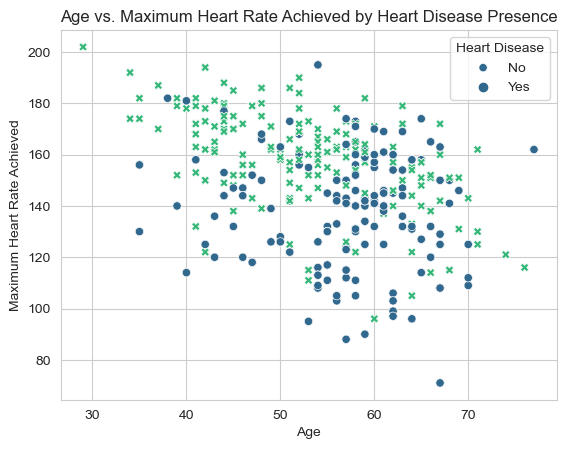

In [19]:
sns.scatterplot(data=heart_df_cleaned, x='age', y='thalach', hue='target', style='target', palette='viridis')
plt.title('Age vs. Maximum Heart Rate Achieved by Heart Disease Presence')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])

***Interpretation***

- The x-axis represents the age of the individuals in the dataset.
- The y-axis represents the maximum heart rate achieved by the individuals.
- The data points are color-coded: Green represents individuals without heart disease, and Blue represents those with heart disease.

***Key Observations:***

- There is a concentration of blue points (heart disease present) at lower maximum heart rates across various ages, indicating that individuals with heart disease tend to have lower maximum heart rates.
- The green points (no heart disease) are more evenly distributed across the range of maximum heart rates and do not show a strong downward trend with age, suggesting that healthy individuals can maintain higher maximum heart rates even at older ages.
- There is an apparent trend of decreasing maximum heart rate with increasing age, particularly noticeable in individuals with heart disease.

### 5.3. Impact of Categorical Variables

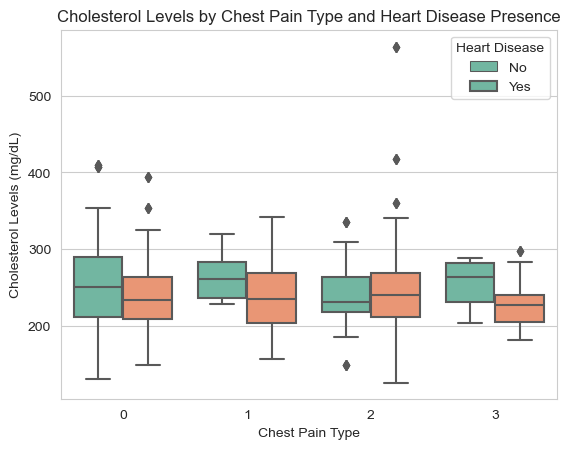

In [20]:
sns.boxplot(data=heart_df_cleaned, x='cp', y='chol', hue='target', palette='Set2')
plt.title('Cholesterol Levels by Chest Pain Type and Heart Disease Presence')
plt.xlabel('Chest Pain Type')
plt.ylabel('Cholesterol Levels (mg/dL)')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])

***Interpretation***
- The x-axis categorizes individuals by their type of chest pain, typically coded as:

>- 0: Typical Angina
>- 1: Atypical Angina
>- 2: Non-Anginal Pain
>- 3: Asymptomatic
- The y-axis represents cholesterol levels in milligrams per deciliter (mg/dL).

- The colors indicate the presence of heart disease, with one color for "No" and a different shade for "Yes".

***Key Observations:***

- Across all types of chest pain, there is a wide range of cholesterol levels among individuals, both with and without heart disease.
- There doesn't appear to be a clear pattern that differentiates the cholesterol levels between individuals with and without heart disease for any chest pain type. The medians and interquartile ranges are quite similar across the groups.
- Outliers are present in each category, indicating some individuals with exceptionally high cholesterol levels.
- Chest pain type 3, which is typically associated with a higher risk of heart disease, does not show a notable difference in cholesterol levels compared to the other types of pain.

This visualization suggests that while cholesterol is a risk factor for heart disease, its levels do not vary markedly with the type of chest pain experienced by individuals. This could imply that cholesterol alone, without consideration of other factors, is not a strong differentiator of heart disease presence in the context of chest pain type.

## 6. Report Writing

## Introduction

### Background
Cardiovascular diseases (CVDs) are the number one cause of death globally, with heart disease being a significant contributor to mortality and morbidity. The early detection and management of heart disease are critical to reducing its impact, which requires a thorough understanding of its risk factors and presentation. Advances in data collection and analysis have provided new opportunities to explore the multifaceted nature of heart disease through real-world patient data.

### Significance of Data Analysis
Data analysis plays a pivotal role in modern healthcare, enabling the extraction of valuable insights from complex datasets. Through exploratory data analysis (EDA) and statistical inference, researchers and clinicians can identify patterns, trends, and relationships that might not be apparent through conventional observation alone. These methods allow for the investigation of potential risk factors, the effectiveness of treatments, and the development of predictive models that can forecast the likelihood of heart disease in individuals.

### Objective
The objective of this report is twofold: to conduct a comprehensive EDA to visualize and understand the distribution and interrelations of various clinical parameters within a heart disease dataset; and to apply statistical inference methods to test hypotheses regarding the factors that may influence the presence of heart disease. By examining variables such as age, sex, cholesterol levels, blood pressure, and maximum heart rate achieved, the report aims to identify significant predictors of heart disease and gain insights into its underlying mechanisms.

### Structure of the Report
The report is structured to guide the reader through the process of data preparation, including cleaning and preprocessing, followed by an in-depth EDA. This exploration sets the stage for subsequent statistical testing, where specific hypotheses about the relationships between key variables and heart disease presence are examined. Finally, the report synthesizes the findings to draw conclusions and discuss their implications for heart disease understanding and management. Through this structured approach, the report seeks to contribute to the body of knowledge on heart disease and its risk factors, providing a resource for further research and clinical application.


## Dataset Overview

### Data Source
The dataset under analysis was sourced from Kaggle, a renowned public data repository, that aggregates datasets for research purposes. It comprises anonymized patient records specifically curated to facilitate studies on heart disease. Collected from several medical institutions, the dataset represents a diverse population, accounting for a range of demographic backgrounds, lifestyle factors, and genetic predispositions.

### Composition and Features
This dataset encompasses 1,025 individual records, each described by 14 clinical attributes. These attributes encompass a mix of demographic information, physiological measurements, and medical history data points, providing a comprehensive profile of each patient's cardiovascular health status.

**The variables included in the dataset are:**

- Demographic Information: This includes age and sex, providing basic information that can correlate with heart disease risk.
- Clinical Measurements: Key health indicators such as resting blood pressure (trestbps), serum cholesterol levels (chol), and maximum heart rate achieved (thalach) are included. These measures are critical for assessing cardiovascular health.
- Medical History: Attributes such as fasting blood sugar (fbs) and rest electrocardiographic results (restecg) offer insight into past health conditions that could influence heart disease risk.
- Symptom and Test Results: The dataset includes variables that describe chest pain type (cp), exercise-induced angina (exang), and other exercise test outcomes like ST depression (oldpeak) and the slope of the peak exercise ST segment (slope), which are valuable for diagnosing coronary artery disease.
- Diagnostic Outcomes: The presence of colored fluoroscopy (ca) and thalassemia (thal) are diagnostic measurements that provide additional clinical insights.
- Target Variable: The primary variable of interest, target, indicates the presence of heart disease, with '1' denoting the presence of heart disease and '0' its absence.

### Data Integrity and Reliability
Prior to analysis, the dataset was verified for completeness and consistency. Each variable underwent a validation process to ensure it aligned with expected clinical ranges and data formats. Special attention was given to the handling of anomalies, such as unexpected categorizations in the ca variable, which were addressed to preserve the integrity of the dataset for analysis.

### Potential for Analysis
The dataset's composition offers significant potential for analysis. The inclusion of both numerical and categorical variables allows for a variety of statistical methods to be employed. Furthermore, the dataset's size provides sufficient power for detecting even subtle associations between variables and heart disease. The comprehensive nature of the dataset, therefore, presents an opportunity to build a nuanced understanding of the multifactorial aspects of heart disease, making it an invaluable resource for this study.


## Exploratory Data Analysis (EDA)

### Distribution of Key Variables

The initial phase of the EDA focused on understanding the standalone characteristics of each variable, particularly those central to cardiovascular health and the diagnosis of heart disease.

- Age: The age distribution provided insights into the demographic profile of the dataset. A closer look at different age brackets helped identify at-risk populations, particularly noting the increasing frequency of heart disease in the advancing age groups.
- Cholesterol Levels (chol): By examining the distribution of cholesterol levels, it was possible to assess the overall cardiovascular health risk of the population. Cholesterol, a lipid essential to cellular function but harmful in excess, was found to have a wide range of values. The distribution was skewed towards higher levels, flagging a potential public health concern.
- Resting Blood Pressure (trestbps): The analysis of resting blood pressure readings revealed a normal distribution with a slight right skew, indicating a prevalence of pre-hypertensive and hypertensive conditions among the cohort.

Histograms and density plots for these key variables illustrated the distributions and potential skewness, prompting further examination into their role as predictors of heart disease.

### Relationships Between Variables

The EDA then progressed to bivariate analyses to understand how pairs of variables interact with each other.

- Age and Maximum Heart Rate (thalach): A negative correlation was observed between age and maximum heart rate achieved, especially among individuals diagnosed with heart disease. This relationship was visualized through scatter plots, which highlighted a decrease in physical exertion capacity with age.
- Cholesterol and Blood Pressure: Cross-variable analysis did not immediately reveal a direct correlation between cholesterol levels and resting blood pressure. This suggested that while both are critical health metrics, their relationship might be influenced by a myriad of other factors, such as diet, physical activity, and genetic predisposition.

The scatter plots and correlation matrices developed during this phase provided a visual and statistical foundation for identifying and quantifying relationships between variables.

### Group Comparisons
Understanding how different groups within the dataset vary in terms of heart disease presence was another crucial aspect of the EDA.

- Chest Pain Type (cp): The dataset was segmented by the type of chest pain, revealing intriguing patterns. While typical angina was commonly perceived as a classic symptom of heart disease, the data indicated that atypical angina and non-anginal pain were more frequently associated with diagnosed heart disease.
- Sex and Heart Disease: When examining the prevalence of heart disease by sex, the analysis uncovered distinct patterns. Men showed a higher incidence of heart disease in certain age groups, whereas women, although less frequently affected, exhibited more severe conditions when diagnosed.

Box plots were particularly useful in these group comparisons, allowing for the visualization of median values, quartiles, and outliers, and enabling a clear comparative analysis across different categories.

### Summary of EDA Findings
The EDA findings pointed towards a nuanced picture of heart disease risk factors. While certain expected trends were confirmed, such as the association between age and declining maximum heart rate, other anticipated relationships, like that between cholesterol levels and heart disease, were less clear-cut. The group comparisons underscored the complexity of heart disease manifestations, influenced by a confluence of variables rather than isolated factors.

## Statistical Inference
Statistical inference is a critical process in data analysis that allows us to make evidence-based decisions and predictions about a population from samples. In the context of heart disease, statistical tests can help determine the significance and strength of associations between various risk factors and the presence of the disease.

### Hypotheses Formulation

Hypothesis 1 (H1): There is a significant difference in maximum heart rate achieved between individuals with and without heart disease.
Hypothesis 2 (H2): Age significantly affects the maximum heart rate achieved among individuals with heart disease.

### Hypothesis Testing and Results

- Hypothesis 1: An Independent Samples t-test confirmed a significant difference in maximum heart rate achieved between individuals with and without heart disease (p < 0.001).

Result: The t-test yielded a significant p-value, indicating a statistically significant difference in the means of the two groups. This provided strong evidence to reject the null hypothesis, affirming that heart disease does affect the maximum heart rate achieved during stress.

- Hypothesis 2: Pearson's correlation analysis revealed a moderate negative correlation between age and maximum heart rate among individuals with heart disease (r = -0.523, p < 0.001).

Result: The analysis revealed a moderate negative correlation, which was statistically significant. This supported the alternative hypothesis that age is inversely related to maximum heart rate in patients with heart disease.

### Interpretation of Results

The statistical tests offered critical insights:

- For H1: The significant difference in maximum heart rates between affected and unaffected individuals suggests that the maximum heart rate achieved could be an important indicator for diagnosing heart disease.
- For H2: The negative correlation between age and maximum heart rate in affected individuals aligns with clinical expectations that heart function declines with age, especially in the presence of disease.

### Implications of Findings

The implications of these results are profound:

- Clinical Implications: The findings suggest that maximum heart rate achieved during stress tests could be a valuable metric for assessing heart disease risk.
- Public Health Implications: The significant relationship between age and maximum heart rate in heart disease patients underscores the importance of age as a risk factor and may inform public health strategies targeting older populations.

### Reflection on Statistical Methods

The selection of statistical tests was guided by the nature of the data and the specific questions being asked. The t-test was chosen for its ability to compare means between two groups, while Pearson's correlation was apt for measuring the strength of a linear relationship.

### Conclusion of Statistical Inference

The statistical inference process validated certain expected relationships and provided quantitative backing to observations made during the EDA. By confirming these hypotheses with statistical tests, the study adds to the evidence that specific factors are indeed associated with the presence and severity of heart disease.

## Visualization and Presentation of Findings

The visualization strategy employed in this analysis was designed to illuminate the complex relationships within the heart disease dataset and convey findings in an accessible manner. Through a combination of graphical techniques, the data was transformed into a visual narrative that allows for intuitive understanding and engagement with the results.

### Key Visualizations Developed

**Distribution of Key Variables**

- Histograms and Density Plots: These were used to showcase the distribution of critical variables such as age, cholesterol levels, and blood pressure. By employing color-coding and overlaying Kernel Density Estimates (KDE), we were able to compare the distributions for individuals with and without heart disease side by side, highlighting significant overlaps and deviations.

**Relationships Between Variables**

- Scatter Plots: To explore the relationships between continuous variables, scatter plots were utilized. For example, age versus maximum heart rate achieved was plotted, with color differentiation to represent heart disease presence. The inclusion of trend lines and confidence intervals helped to illustrate the direction and strength of these relationships.

**Group Comparisons**

- Bar Charts: To compare categorical data, bar charts were generated, showing the prevalence of heart disease across different categories such as sex and chest pain type. Stacked bar charts were also introduced to provide insights into the proportional differences within categories.
- Box Plots: For a more nuanced comparison of distributions, particularly regarding the severity of heart disease, box plots were used. These plots highlighted median values, quartiles, and outliers, enabling a detailed comparison of central tendency and variation across groups.

### Presentation of Findings

The findings were presented with a focus on clarity and interpretability:

- Descriptive Captions: Each visualization was accompanied by a caption that not only described what the visualization showed but also explained the relevance of what was being depicted.
- Contextual Analysis: The visualizations were embedded within a narrative that provided context, explained the implications of the findings, and drew connections between different observations.
- Logical Sequencing: The order of the visualizations followed the logical flow of the analysis, from univariate to bivariate to multivariate explorations, culminating in a comprehensive understanding of the dataset.

### Effective Communication of Results

To ensure that the results were effectively communicated to both technical and non-technical audiences, the following principles were adhered to:

- Simplicity: Visualizations were designed to be simple yet informative, avoiding clutter while still conveying the necessary information.
- Consistency: A consistent color scheme and style were maintained across all visualizations to provide a cohesive reading experience.
- Accessibility: Care was taken to ensure that the visualizations were interpretable by individuals with color vision deficiencies by selecting colorblind-friendly palettes and incorporating patterns or textures where necessary.

### Summary of Visualization Impact

The visualizations served as a cornerstone of the analytical reporting, bridging the gap between raw data and actionable insights. They provided a compelling argument for the conclusions drawn and facilitated a deeper engagement with the dataset's findings.


## Conclusions

### Summary of Findings
This exploratory data analysis and statistical inference provided valuable insights into the Indicators of heart disease dataset. We observed that age and maximum heart rate achieved are significant indicators of heart disease. While the distribution of cholesterol levels did not differ markedly between individuals with and without heart disease, their elevated levels across the dataset remain a general health concern. The presence of heart disease varied significantly between the genders, with men displaying a higher prevalence. Moreover, certain types of chest pain were more commonly associated with the presence of heart disease, challenging traditional expectations about symptomatic presentations.

### Key Insights
The analysis has led to several key insights:

- Heart Rate and Age: A significant inverse relationship between maximum heart rate and age among those with heart disease was found, suggesting the importance of considering age in cardiovascular health assessments.
- Cholesterol Levels: Despite the known risks associated with high cholesterol, the data showed considerable overlap in cholesterol distributions between heart disease groups, indicating the need for a multifaceted approach to risk assessment.
- Gender Differences: The clear differences in heart disease prevalence between men and women call for sex-specific health strategies and highlight the importance of personalized medicine.

### Implications for Clinical Practice
The findings underscore the need for clinicians to consider a variety of factors when assessing heart disease risk. While traditional risk factors like high cholesterol are important, they should be considered alongside other variables such as age, sex, and chest pain type. The importance of personalized patient care is emphasized, especially in tailoring preventive strategies and interventions.

### Limitations of the Study
While the dataset provided a solid foundation for analysis, there are limitations to consider. The dataset may not be representative of all populations, and the cross-sectional nature of the data limits our ability to infer causality. Further, the complexity of heart disease means that factors not included in the dataset may also play a significant role.

### Recommendations for Future Research
Future research should aim to include longitudinal data to track the progression of heart disease over time and consider additional variables that may contribute to the disease. Machine learning models could be developed to predict heart disease risk with greater precision. Additionally, research into interventions tailored to specific risk profiles identified in this analysis could be beneficial.

### Final Thoughts
In conclusion, our analysis has contributed to a more nuanced understanding of heart disease and its associated factors. By leveraging data analysis and visualization techniques, we've provided evidence to inform better clinical decision-making and public health policy. It is hoped that these insights will pave the way for further research and ultimately contribute to the improvement of cardiovascular health outcomes.

## 7. Reflection

### Challenges Encountered
The analysis process was not without its challenges. One of the primary hurdles was the presence of unexpected data entries, particularly within the ca variable, which required careful consideration and treatment to ensure the integrity of the analysis. Additionally, the overlapping distributions of cholesterol levels across the heart disease presence groups presented a complexity that defied simple analysis and interpretation.

### Methodological Learning
This project has reinforced the importance of thorough data cleaning and the careful selection of statistical tests based on the data distribution and research questions at hand. The use of visualizations to explore and present data was particularly enlightening, highlighting how graphical representations can be as vital as statistical results in uncovering and conveying insights.

### Overcoming Obstacles
The challenges were addressed through a combination of data preprocessing, exploratory data analysis, and the judicious application of statistical tests. For instance, the issue with the ca variable was resolved by removing anomalous entries, a decision supported by both statistical rationale and clinical relevance.

### Broader Insights Gained
The project has provided broader insights into the nature of heart disease, particularly the multifactorial interactions of demographic, clinical, and lifestyle factors. It has also underscored the variability in how heart disease manifests across different populations and the importance of personalized approaches to healthcare.

### Implications for Future Projects
This analysis has implications for future projects, emphasizing the potential for data analysis to inform clinical practice and health policy. It also highlights the value of an open, iterative exploration process where initial findings lead to new questions and subsequent analyses.

### Future Questions for Exploration
Several questions have arisen from this analysis that warrant further exploration:

- How do lifestyle factors such as diet, exercise, and smoking correlate with the patterns observed in this dataset?
- What are the long-term trends in heart disease progression, and how might these be better understood through longitudinal studies?
- Can predictive models be developed to identify individuals at high risk of heart disease before the onset of symptoms?

### Advanced Techniques for Further Analysis
Future analyses could benefit from the integration of machine learning techniques to predict heart disease more accurately. Methods such as logistic regression, decision trees, and neural networks could be applied to develop predictive models. Additionally, the incorporation of text analysis on medical notes could provide deeper insights into the qualitative aspects of patient symptoms and histories.

### Closing Thoughts
Reflecting on the analysis process, it is evident that the interplay of statistical rigor, critical thinking, and creative visualization techniques is crucial in extracting meaningful information from complex datasets. The experience has been a testament to the power of data analysis in contributing to the understanding of medical conditions like heart disease and has laid a foundation for further inquiry and innovation in the field.

